# Exercise 3 | Part 2: Neural Networks

In [1]:
%matplotlib inline

from scipy.io import loadmat
from scipy.optimize import minimize
from numpy import mean, sqrt, floor, ceil, ones, newaxis, arange, zeros, ones, c_, array, log, finfo, float64, exp, double
from numpy.random import permutation, randint
from matplotlib.pyplot import show, imshow, axis

In [2]:
# setup the parameters you will use for this exercise

input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

## Part 1: Loading and Visualizing Data

We start the exercise by first loading and visualizing the
dataset. You will be working with a dataset that contains handwritten
digits.

In [3]:
def display_data(X, example_width=None):
    m, n = X.shape
    if not example_width:
      # assume the example is a square image
      example_width = round(sqrt(n))

    # Compute rows, cols
    example_height = int((n / example_width))
    example_width = int(example_width)

    # Compute number of items to display
    display_rows = int(floor(sqrt(m)))
    display_cols = int(ceil(m / display_rows))
    
    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - ones((pad + display_rows * (example_height + pad),
                            pad + display_cols * (example_width + pad)))

    base_rows = arange(example_height)
    base_cols = arange(example_width)

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex, :]))

            #print X[curr_ex, :].reshape(example_height, example_width) / max_val
            rows = pad + base_rows[:, newaxis] + j * (pad + example_height)
            cols = pad + base_cols + i * (pad + example_width)
            display_array[rows, cols] = X[curr_ex, :]\
              .reshape(example_height, example_width) / max_val
            curr_ex += 1

    imgplot = imshow(display_array.T)
    # Gray Image
    imgplot.set_cmap('gray')
    axis('off')

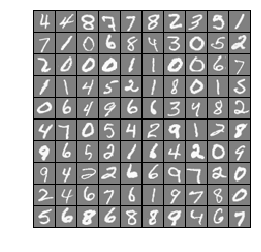

In [4]:
# Loading and Visualizing Data ...

data1 = loadmat('ex3data1.mat')
X = data1['X']
y = data1['y']
m, n = X.shape

rand_indices = permutation(m)
sel = X[rand_indices[:100], :]

display_data(sel)
show(block=False)

## Part 2: Loading Pameters

In this part of the exercise, we load some pre-initialized neural
network parameters.

In [5]:
# Loading Saved Neural Network Parameters ...

# Load the weights into variables Theta1 and Theta2
weights1 = loadmat('ex3weights.mat')
theta1 = weights1['Theta1']
theta2 = weights1['Theta2']

## Part 3: Implement Predict

After training the neural network, we would like to use it to predict
the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets
you compute the training set accuracy.

In [6]:
def sigmoid(z):
  return 1. / (1. + exp(-z))

def predict(theta1, theta2, X):
    """Predict the label of an input given a trained neural network."""
    m = X.shape[0]

    X = c_[ones((m, 1)), X]

    z2 = X.dot(theta1.T)
    a2 = c_[ones((m, 1)), sigmoid(z2)]
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)

    return a3.argmax(axis=1) + 1

In [7]:
pred = predict(theta1, theta2, X)
print(f'''Training Set Accuracy: {mean(double(pred == y.flatten())) * 100:.2f}''')

Training Set Accuracy: 97.52


To give you an idea of the network's output, you can also run through the examples one at the a time to see what it is predicting.

Neural Network Prediction: 7 (digit 7)



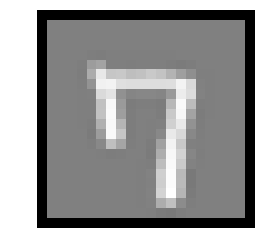

In [8]:
i = randint(0, high=X.shape[0])
sample = X[i].reshape(1, -1)
display_data(sample)
pred = predict(theta1, theta2, sample)[0]
print(f'''Neural Network Prediction: {pred} (digit {pred % 10})\n''')